In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import keras

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models

In [40]:
# Dataset path
# https://drive.google.com/drive/folders/1T4x9NiODl8yP1OBd69uOZnreKHuMLAxz?usp=drive_link

dataset_path = '/content/drive/MyDrive/Datasets/Mini Dog Breed Data'
labels = os.listdir(dataset_path)

df = pd.DataFrame([[1,2],[3,4],[4,5]])
df

,0,1
0,1,2
1,3,4
2,4,5


In [41]:
data = []
index = 0

for label in os.listdir(dataset_path):
  for img in os.listdir('{}/{}'.format(dataset_path,label)):
    img_id = img
    img_label = label
    data.append({"index": index, "img_id":img_id, "img_label":img_label})
    index +=1

df = pd.DataFrame(data)

In [42]:
df = df.dropna()
df

,index,img_id,img_label
0,0,09a1ea62ffa4b9389c03162bb0b0b572.jpg,saint_bernard
1,1,215fb2b75397fe9010c35fe84f2a07b2.jpg,saint_bernard
2,2,039bdddd8546f0fafdf984b810d1138b.jpg,saint_bernard
3,3,14e9a6d002632db71a18283fc024f086.jpg,saint_bernard
4,4,03b0e7ace52c10dc4878f60307cdebe3.jpg,saint_bernard
...,...,...,...
492,492,edeb63f8216445c1fd9572929e5e2557.jpg,silky_terrier
493,493,efeeefcc693ae837060c1c103195c4a6.jpg,silky_terrier
494,494,f42afcc1fabac064a07c6a5b7ae2766e.jpg,silky_terrier
495,495,fdc0556f9b32a714b56985eb99fbbbeb.jpg,silky_terrier


In [43]:
#
X_data = np.zeros(shape=(len(df), 224, 224, 3), dtype='float32')

# One-hot encodings
y_data = label_binarize(df["img_label"], classes=labels)

In [44]:
X_data.shape, y_data.shape

((497, 224, 224, 3), (497, 5))

In [45]:
index = 0
for label in os.listdir(dataset_path):
  for img in tqdm(os.listdir('{}/{}'.format(dataset_path, label))):

    img_address = dataset_path + '/' + label + '/' + img
    loaded_img = keras.preprocessing.image.load_img(img_address, target_size=(224,224))
    img_array = keras.preprocessing.image.img_to_array(loaded_img)
    x = np.expand_dims(img_array.copy(), axis=0)
    X_data[index] = x / 255.0
    index +=1

100%|██████████| 110/110 [00:02<00:00, 54.33it/s]


In [46]:
X_data.shape, x.shape, y_data.shape

((497, 224, 224, 3), (1, 224, 224, 3), (497, 5))

In [47]:
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(X_data, y_data, test_size=0.05, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val, test_size=0.05, shuffle=True)


X_train.shape, X_val.shape, X_test.shape

((448, 224, 224, 3), (24, 224, 224, 3), (25, 224, 224, 3))

In [48]:
# Building the model

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu', input_shape=(224*224*3, ), kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(len(labels), activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Ba  (None, 26, 26, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                      

In [50]:
# model = models.Sequential()

# # Convolutional layers
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# # Flatten layer to transition from convolutional layers to dense layers
# model.add(layers.Flatten())

# # Dense (fully connected) layers
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))

# # Output layer with softmax activation for multi-class classification
# model.add(layers.Dense(11, activation='softmax'))  # Assuming 11 dog breeds

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
14/14 [==============================] - 39s 2s/step - loss: 17.4099 - accuracy: 0.2746 - val_loss: 30.0931 - val_accuracy: 0.2500
Epoch 2/25
14/14 [==============================] - 33s 2s/step - loss: 17.2805 - accuracy: 0.3772 - val_loss: 41.6005 - val_accuracy: 0.2500
Epoch 3/25
14/14 [==============================] - 34s 2s/step - loss: 16.9547 - accuracy: 0.4330 - val_loss: 28.4757 - val_accuracy: 0.2500
Epoch 4/25
14/14 [==============================] - 37s 3s/step - loss: 16.0747 - accuracy: 0.5223 - val_loss: 21.1960 - val_accuracy: 0.2500
Epoch 5/25
14/14 [==============================] - 35s 2s/step - loss: 15.6414 - accuracy: 0.4799 - val_loss: 17.1355 - val_accuracy: 0.3750
Epoch 6/25
14/14 [==============================] - 34s 2s/step - loss: 14.9818 - accuracy: 0.5156 - val_loss: 15.8124 - val_accuracy: 0.3333
Epoch 7/25
14/14 [==============================] - 34s 2s/step - loss: 14.2001 - accuracy: 0.5603 - val_loss: 15.1268 - val_accuracy: 0.1667
Epoch 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

1/1 [==============================] - 0s 422ms/step - loss: 8.1221 - accuracy: 0.2400
Test loss: 8.12207317352295
Test accuracy: 0.23999999463558197


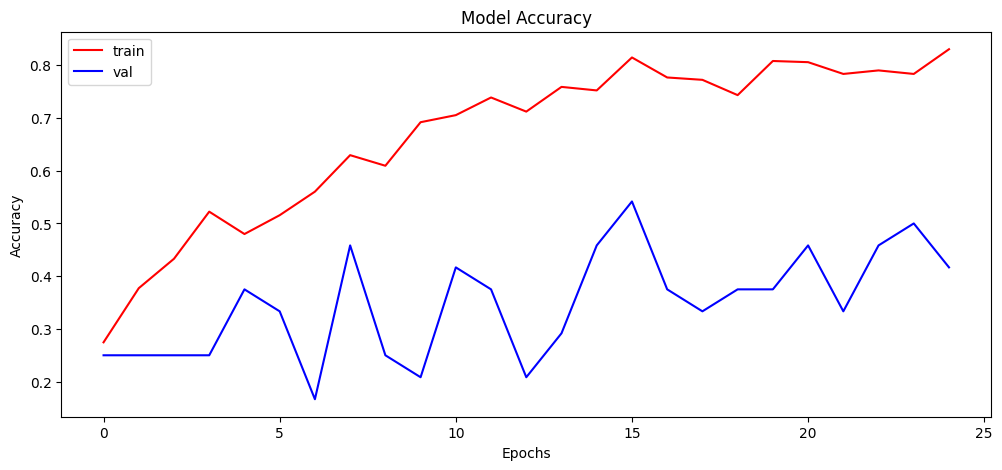

In [ ]:
# Training History

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

1/1 [==============================] - 1s 765ms/step - loss: 8.1221 - accuracy: 0.2400
Accuracy over the test set: 
  24.0 %


In [ ]:
X_test.shape

(25, 224, 224, 3)

['saint_bernard', 'siberian_husky', 'yorkshire_terrier', 'scottish_deerhound', 'silky_terrier']
1/1 [==============================] - 1s 1s/step


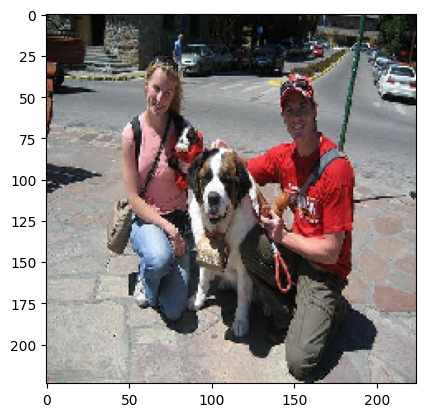

Originally :  saint_bernard
Predicted :  silky_terrier


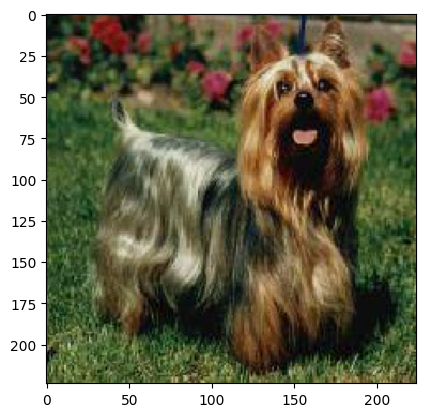

Originally :  silky_terrier
Predicted :  silky_terrier


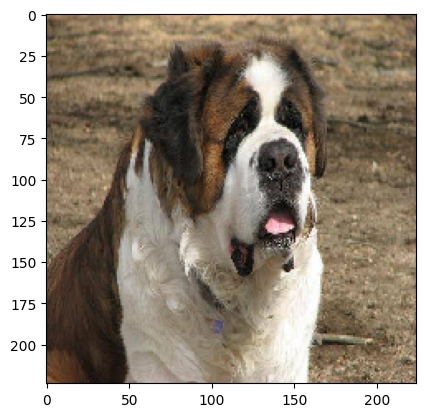

Originally :  saint_bernard
Predicted :  saint_bernard


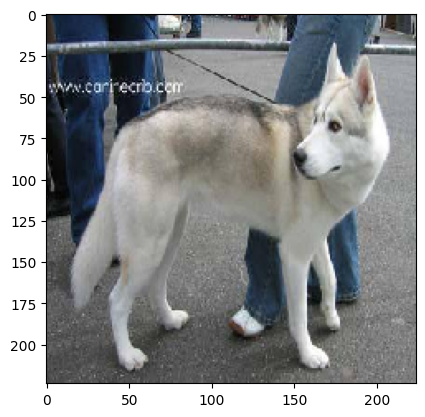

Originally :  siberian_husky
Predicted :  scottish_deerhound


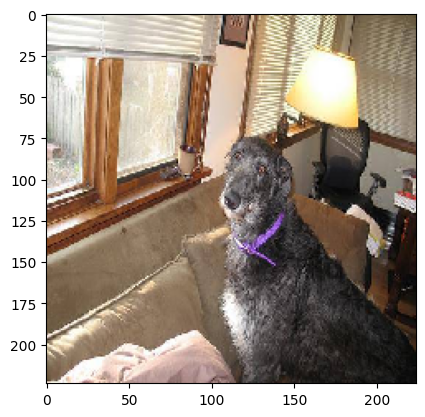

Originally :  scottish_deerhound
Predicted :  silky_terrier


In [ ]:
# PLOTTING IMAGE TO COMPARE

print(labels)
y_pred = model.predict(X_test)

for i in range(5):
  plt.imshow((X_test[i,:,:,:] * 255.0).astype(np.uint8))
  plt.show()

  # Finding max value from predition list and comaparing original value vs predicted

  print("Originally : ", labels[np.argmax(y_test[i])])
  print("Predicted : ", labels[np.argmax(y_pred[i])])
